# Poster SMLMS 2025

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Remove the last line SNR=5
def plot_from_csv(csv_file, noise_values, psf_values):
    df = pd.read_csv(csv_file)
    print(df)
    
    N_Noise = len(noise_values)
    N_PSF = len(psf_values)
    print(N_Noise, N_PSF)
    mse_grid = np.full((N_Noise, N_PSF))
    print(mse_grid)
    for _, row in df.iterrows():
        i = noise_values.index(row["noise"])
        j = psf_values.index(row["psf"])
  
    #cmap = plt.cm.get_cmap('viridis')
    norm = mcolors.Normalize(vmin=np.nanmin(mse_grid), vmax=np.nanmax(mse_grid))
    norm = mcolors.Normalize(vmin=0, vmax=1)

    plt.figure(figsize=(10, 6))
    im = plt.imshow(mse_grid, cmap=cmap, norm=norm, aspect='auto')
    plt.gca().set_aspect('equal', adjustable='box')
    for i in range(N_Noise):
        for j in range(N_PSF):
            val = mse_grid[i, j]
            if not np.isnan(val):
                plt.text(j, i, f"{val:.3f}", ha='center', va='center', color='white', fontsize=15, weight='bold')
    plt.xticks([])
    plt.yticks([])
    
    plt.xticks(np.arange(N_PSF), psf_values, fontsize=14)
    plt.yticks(np.arange(N_Noise-1), noise_values[:-1], fontsize=14)
    plt.tight_layout()
    plt.savefig(f"poster-plot-noise-psf-final.pdf", format='pdf', bbox_inches='tight')
    plt.savefig(f"poster-plot-noise-psf-final.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

noise_values = [100, 20, 10]
psf_values = [1.25, 1.67, 2.5]
csv_path = "PSFNoiseResults-final.csv"
plot_from_csv(csv_path, noise_values,psf_values)

      key  noise   psf       mse       std
0  tr_0_0    100  1.25  0.272232  0.128705
1  tr_2_0    100  1.67  0.362600  0.150512
2  tr_4_0    100  2.50  0.419990  0.161912
3  tr_0_3     20  1.25  0.468984  0.170777
4  tr_2_3     20  1.67  0.514371  0.177182
5  tr_4_3     20  2.50  0.576237  0.189765
6  tr_0_4     10  1.25  0.687336  0.196461
7  tr_2_4     10  1.67  0.703371  0.206629
8  tr_4_4     10  2.50  0.897210  0.233312
3 3


TypeError: full() missing 1 required positional argument: 'fill_value'

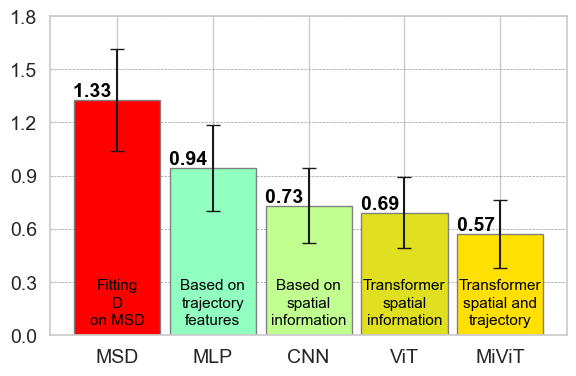

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys

def plot_model_errors_from_csv(csv_file, selected_models, info1_models, info2_models, info3_models):
    df = pd.read_csv(csv_file)

    if selected_models is not None:
        df = df.set_index("model").loc[selected_models].reset_index()
    else:
        selected_models = df["model"].tolist()

    model_names = df["model"].tolist()
    mean_errors = df["mse"].astype(float).tolist()
    std_errors = df["std"].astype(float).tolist()

    # Custom colors and gray border
    c1 = '#FF0000'
    c2 = '#90FFC0'
    c3 = '#C0FF90'
    c4 = '#E0E020'
    c5 = '#FFE000'
   
    colors = [c1, c2, c3, c4, c5]

    fig, ax = plt.subplots(figsize=(6, 4))

    bars = ax.bar(model_names, mean_errors, yerr=std_errors, width=0.9, capsize=5, alpha=1, color=colors, edgecolor='gray', linewidth=1.0)

    # Horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.8)
    ax.set_axisbelow(True)

    # Lighten and reduce y-axis ticks
    ax.set_ylim(0, 1.6)
    ax.set_yticks(np.linspace(0, 1.8, 7))  # ~5 ticks
    ax.tick_params(axis='y', labelsize=11, width=0.5)

    # Remove x-axis title and rotate labels cleanly
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(model_names, rotation=0, fontsize=12)

    # Add value and info labels
    for i, (mean, std) in enumerate(zip(mean_errors, std_errors)):
        if not np.isnan(std):
            y = mean - 2*std - 0.02 * max(mean_errors)
            ax.text(i, mean+0.05, f'{mean:.2f} ', fontsize=14, color="black", ha='right', va='center', weight='bold')
            ax.text(i, 0.28, info1_models[i], fontsize=11, color="black", ha='center', va='center')
            ax.text(i, 0.18, info2_models[i], fontsize=11, color="black", ha='center', va='center')
            ax.text(i, 0.08, info3_models[i], fontsize=11, color="black", ha='center', va='center')

    plt.tick_params(axis='y', labelsize=14, width=0.5)
    plt.tick_params(axis='x', labelsize=14, width=0.5)

    plt.tight_layout()
    plt.savefig(f"poster-plot-models-error-final.pdf", format='pdf', bbox_inches='tight')
    plt.savefig(f"poster-plot-models-error-final.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
all_models = ['MSD', 'MLP', 'CNN', 'ViT', 'MiViT']
info1_models = [ 'Fitting', 'Based on', 'Based on', 'Transformer', 'Transformer']
info2_models = [ 'D', 'trajectory', 'spatial', 'spatial', 'spatial and']
info3_models = [ 'on MSD', 'features', 'information', 'information', 'trajectory']

path = "poster-model_errors-final.csv"
plot_model_errors_from_csv(path, all_models, info1_models, info2_models, info3_models)


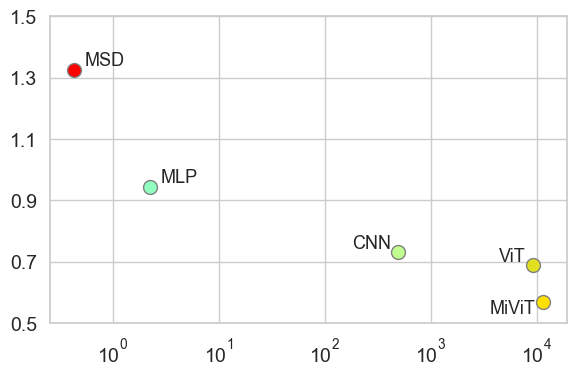

In [239]:
time_dict = {
    "MSD": (0.429,0.014),
    "MLP": (2.24,0.2),
    "CNN": (496,22),
    "ViT": (9200,415),
    "MiViT": (11600,135),
}

# Load MSE data from CSV
path = "poster-model_errors-final.csv"
df = pd.read_csv(path)

# Create mse_dict with model names as keys and MSE values as values
mse_dict = dict(zip(df["model"], df["mse"].astype(float)))

def plot_time_vs_error(selected_models, mse_dict, time_dict):
    x = []
    y = []
    xerr = []
    labels = []
    c1 = '#FF0000'
    c2 = '#90FFC0'
    c3 = '#C0FF90'
    c4 = '#E0E020'
    c5 = '#FFE000'
   
    color_dict = {"MSD":c1, "MLP":c2, "CNN":c3, "ViT":c4, "MiViT":c5}
    colors = [c1, c2, c3, c4, c5]
    for model in selected_models:
        if model not in mse_dict or model not in time_dict:
            raise ValueError(f"Missing data for model '{model}' in mse_dict or time_dict.")
        if model not in color_dict:
            raise ValueError(f"Missing color for model '{model}' in color_dict.")
        
        x.append(time_dict[model][0])
        xerr.append(time_dict[model][1])
        y.append(mse_dict[model])
        colors.append(color_dict[model])
        labels.append(model)

    plt.figure(figsize=(6, 4))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], s=100, color=colors[i], edgecolors='gray', label=labels[i], marker='o')
        # Manual positioning for each label to avoid overlap with points
        offset_x = x[i] * 1.25 if i < 2 else x[i] * 0.85  # Horizontal offset
        offset_y = y[i]
        if i==4: offset_y = offset_y - 0.05
        plt.text(offset_x, offset_y, labels[i], fontsize=13, ha='left' if i < 2 else 'right', va='bottom' )

    #plt.xlabel("Time (ms), prediction on 10000 images", fontsize=16)
    #plt.ylabel("MSE", fontsize=16)
    plt.xscale('log')
    plt.ylim(0.5, 1.5)
    plt.yticks(np.linspace(0.5, 1.5, 6))
    plt.tick_params(axis='y', labelsize=14, width=0.5)
    plt.tick_params(axis='x', labelsize=14, width=0.5)

    #plt.title("Prediction time vs Mean Squared Error", fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"poster-plot-time-error-final.pdf", format='pdf', bbox_inches='tight')
    plt.savefig(f"poster-plot-time-error-final.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

#plot_time_vs_error(sel_models, colors_dict, mse_dict, time_dict)
plot_time_vs_error(time_dict.keys(), mse_dict, time_dict)

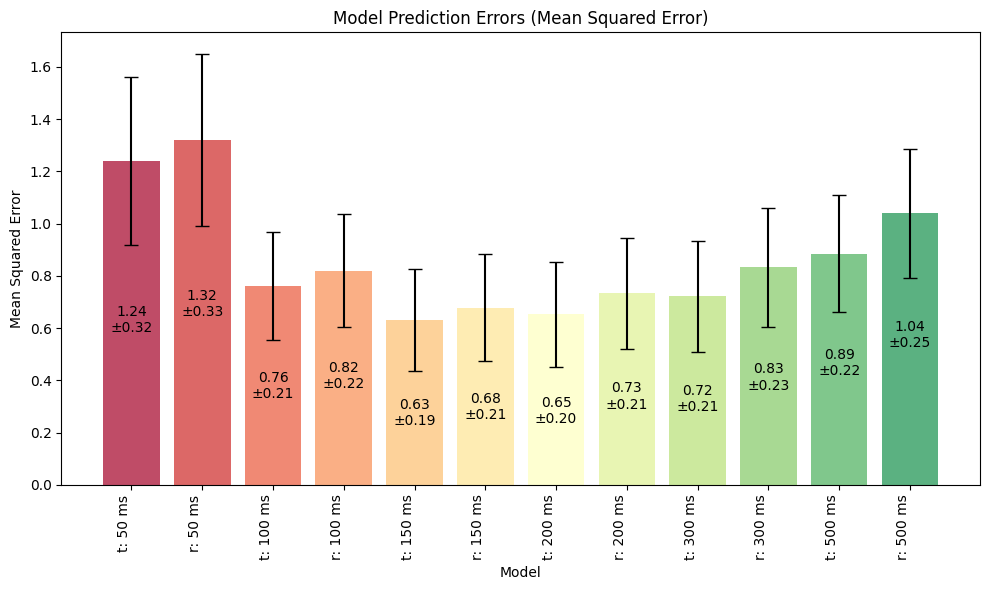

{'t: 50 ms': (0.6470588235294118, 0.0, 0.14901960784313725, 1.0), 'r: 50 ms': (0.8085351787773933, 0.15501730103806227, 0.1522491349480969, 1.0), 't: 100 ms': (0.9167243367935409, 0.3430219146482122, 0.22399077277970014, 1.0), 'r: 100 ms': (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), 't: 150 ms': (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0), 'r: 150 ms': (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0), 't: 200 ms': (0.9970780469050365, 0.9987697039600154, 0.7450211457131872, 1.0), 'r: 200 ms': (0.8743560169165707, 0.9470972702806614, 0.5770857362552866, 1.0), 't: 300 ms': (0.7176470588235296, 0.8797385620915034, 0.45882352941176485, 1.0), 'r: 300 ms': (0.5181084198385237, 0.7928489042675895, 0.4011534025374856, 1.0), 't: 500 ms': (0.29480968858131484, 0.6899653979238755, 0.3619377162629758, 1.0), 'r: 500 ms': (0.0839677047289504, 0.5628604382929643, 0.2964244521337947, 1.0)}


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
def save_model_errors_to_csv(mse_dict, std_dict, filename):
    rows = []
    for model in mse_dict:
        mse = mse_dict[model]
        std = std_dict.get(model, np.nan)
        rows.append({
            "model": model,
            "mse": mse,
            "std": std
        })
    df = pd.DataFrame(rows)
    df.to_csv(filename, index=False)

import matplotlib.pyplot as plt
import pandas as pd

def plot_model_errors_from_csv(csv_file, colors_dict, selected_models=None):
    df = pd.read_csv(csv_file)

    if selected_models is not None:
        df = df[df["model"].isin(selected_models)]

    model_names = df["model"].tolist()
    mean_errors = df["mse"].astype(float).tolist()
    std_errors = df["std"].astype(float).tolist()
    colors = [colors_dict.get(name, "#000000") for name in model_names]  # fallback to black

    plt.figure(figsize=(10, 6))

    bars = plt.bar(model_names, mean_errors, yerr=std_errors,
                   capsize=5, alpha=0.7, color=colors)

    plt.title('Model Prediction Errors (Mean Squared Error)')
    plt.xlabel('Model')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()

    for i, (mean, std) in enumerate(zip(mean_errors, std_errors)):
        if not np.isnan(std):
            y = mean - 2*std - 0.02 * max(mean_errors)
            plt.text(i, y, f'{mean:.2f}\n±{std:.2f}', ha='center', va='bottom')

    plt.show()



colors_dict2 = {'t: 50 ms': (0.6470588235294118, 0.0, 0.14901960784313725, 1.0), 'r: 50 ms': (0.8085351787773933, 0.15501730103806227, 0.1522491349480969, 1.0), 't: 100 ms': (0.9167243367935409, 0.3430219146482122, 0.22399077277970014, 1.0), 'r: 100 ms': (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), 't: 150 ms': (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0), 'r: 150 ms': (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0), 't: 200 ms': (0.9970780469050365, 0.9987697039600154, 0.7450211457131872, 1.0), 'r: 200 ms': (0.8743560169165707, 0.9470972702806614, 0.5770857362552866, 1.0), 't: 300 ms': (0.7176470588235296, 0.8797385620915034, 0.45882352941176485, 1.0), 'r: 300 ms': (0.5181084198385237, 0.7928489042675895, 0.4011534025374856, 1.0), 't: 500 ms': (0.29480968858131484, 0.6899653979238755, 0.3619377162629758, 1.0), 'r: 500 ms': (0.0839677047289504, 0.5628604382929643, 0.2964244521337947, 1.0)}
path = "exposure_time_errors.csv"

selected_models = None
# décommente cette ligne pour avoir uniquement les modèles transformers
#selected_models = [n for n in colors_dict2 if "t" in n]
plot_model_errors_from_csv(path,colors_dict2,selected_models)

print(colors_dict2)

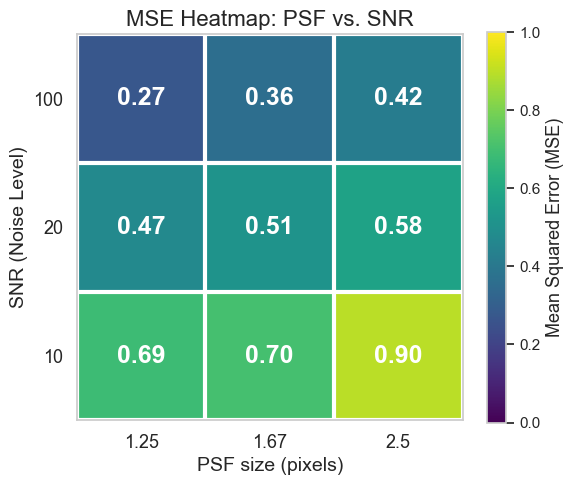

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Load data
csv_path = "PSFNoiseResults-final.csv"
df = pd.read_csv(csv_path)
df.columns = [col.strip().lower() for col in df.columns]

# Check required columns
assert 'noise' in df.columns and 'psf' in df.columns and 'mse' in df.columns, "Missing required columns."

# Pivot table
pivot = df.pivot(index="noise", columns="psf", values="mse")
pivot = pivot.sort_index(ascending=False)

# Axis values
psf_values = pivot.columns.to_list()
snr_values = pivot.index.to_list()

# Plot
fig, ax = plt.subplots(figsize=(6, 5))

# Normalize colormap from 0 to 1
norm = mcolors.Normalize(vmin=0, vmax=1)
im = ax.imshow(pivot.values, cmap='viridis', norm=norm, aspect='equal')

# Grid lines to separate pixels
for i in range(len(snr_values) + 1):
    ax.axhline(i - 0.5, color='white', linewidth=3)
for j in range(len(psf_values) + 1):
    ax.axvline(j - 0.5, color='white', linewidth=3)

# Tick labels
ax.set_xticks(np.arange(len(psf_values)))
ax.set_xticklabels(psf_values, fontsize=13)
ax.set_xlabel("PSF size (pixels)", fontsize=14)

ax.set_yticks(np.arange(len(snr_values)))
ax.set_yticklabels(snr_values, fontsize=13)
ax.set_ylabel("SNR (Noise Level)", fontsize=14)
ax.grid(False)
# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Mean Squared Error (MSE)", fontsize=13)
cbar.ax.tick_params(labelsize=11)

# Annotate values inside cells (larger text)
for i in range(len(snr_values)):
    for j in range(len(psf_values)):
        val = pivot.values[i, j]
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white', fontsize=18, weight='bold')

plt.title("MSE Heatmap: PSF vs. SNR", fontsize=16)
plt.tight_layout()
plt.savefig(f"poster-plot-noise-psf-final.pdf", format='pdf', bbox_inches='tight')
plt.savefig(f"poster-plot-noise-psf-final.png", format='png', dpi=300, bbox_inches='tight')

plt.show()
